In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Wine.csv')

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
data.shape

(178, 14)

In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [7]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [8]:
data_values = data.values

In [9]:
X = data_values[:,:-1]
y = data_values[:,-1]

In [10]:
X.shape

(178, 13)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
X_train = sc.transform(x_train)
X_test = sc.transform(x_test)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("This confusion matrix without PCA ")
print(cm)

This confusion matrix without PCA 
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) 
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)

In [29]:
model = LogisticRegression(random_state = 1)
model.fit(X_trainPCA, y_train)
y_predPCA = model.predict(X_testPCA)

In [30]:
cmPCA = confusion_matrix(y_test,y_predPCA)
print("This confusion matrix with PCA.")
print(cmPCA)

This confusion matrix with PCA.
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


In [31]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_) 

[4.82894083 2.52920254 1.40778607]
[0.36884109 0.19318394 0.10752862]


In [32]:
import numpy as np

print(np.sum(pca.explained_variance_ratio_))

0.6695536580024907


Text(0, 0.5, 'The explained varaince')

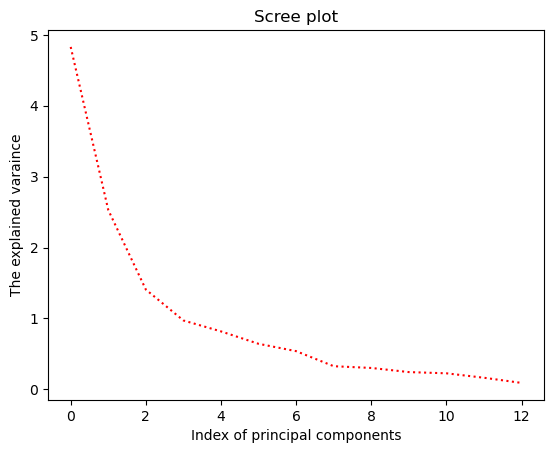

In [32]:
import matplotlib.pyplot as plt

figure = plt.figure()
ax = plt.gca()
plt.plot(pca.explained_variance_, color='red', linestyle='dotted')
ax.set_title("Scree plot")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("The explained varaince")

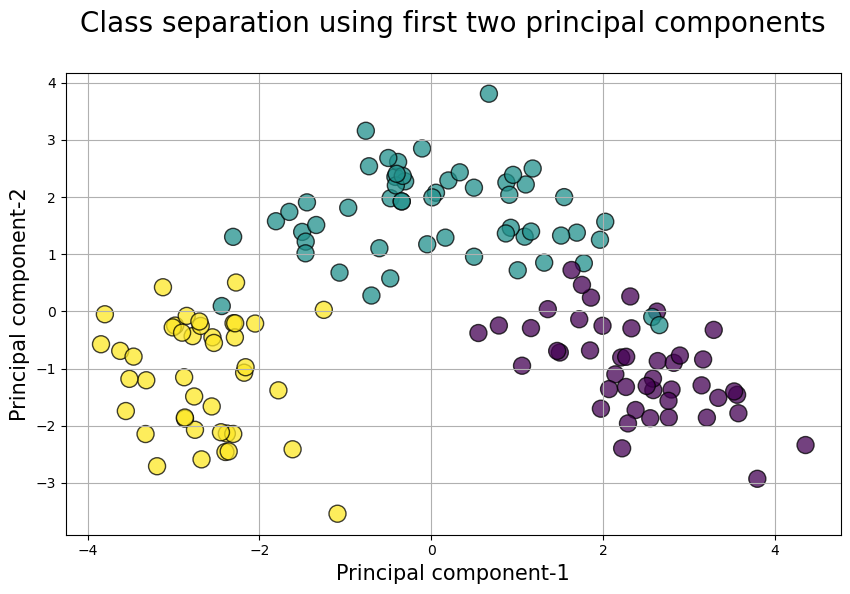

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(X_trainPCA[:,0],X_trainPCA[:,1],c=y_train,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()